Introduction text
https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/
    

In [243]:
# libraries to import
import numpy as np
import matplotlib.pyplot as plt

In [244]:
# Total number of arms
N_ARMS = 6

# probabilities
p = np.random.rand(N_ARMS)
highest_prob_arm = np.argmax(p)
print("The arm with the highest probability is at index : " + str(highest_prob_arm) + " \nits probability is : " + str(p[highest_prob_arm]))

initial_money = 1000000
price_per_play = 0.5
reward = 1

The arm with the highest probability is at index : 2 
its probability is : 0.8881274184690806


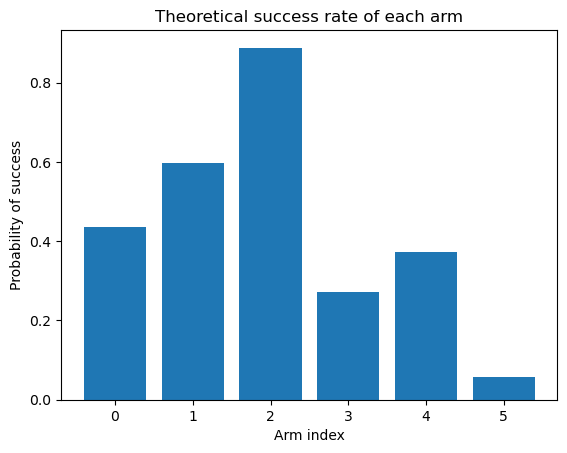

In [245]:
fig = plt.figure()
y_axis = p

# Create bar chart
plt.bar(range(len(y_axis)), y_axis)

# Add labels and title
plt.xlabel("Arm index")
plt.ylabel("Probability of success")
plt.title("Theoretical success rate of each arm")

# Show the plot
plt.show()

# Strategy 1 : Explore then exploit

For this, we explore by playing a 500 times each arm, then depending on which one got us the most wins, we decide to commit to it.

In [246]:
explore_per_arm = 500

results_all_arms = np.zeros((N_ARMS, explore_per_arm))
print("We have the arms in the rows, and results of explore in the columns " + str(np.shape(results_all_arms)))

for arm_index in range(N_ARMS):
    results_all_arms[arm_index, :] = np.random.choice([0, 1], size=(1, explore_per_arm), p=[1-float(p[arm_index]), float(p[arm_index])])
    
results_all_arms

We have the arms in the rows, and results of explore in the columns (6, 500)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [247]:
end_of_explore_results = np.sum(results_all_arms, axis=1)
end_of_explore_results

array([203., 320., 445., 141., 193.,  32.])

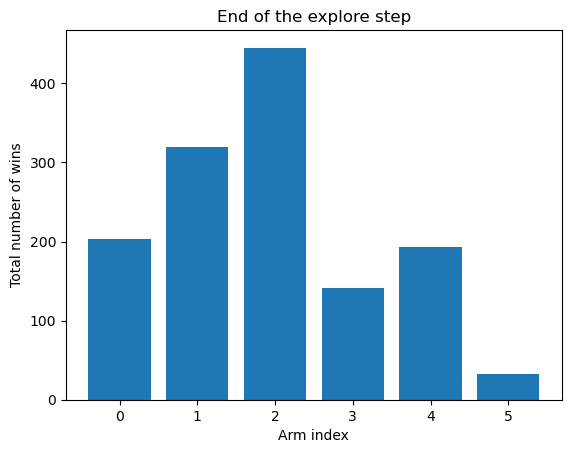

In [248]:
# Plot
fig = plt.figure()
y_axis = p

# Create bar chart
plt.bar(range(len(end_of_explore_results)), end_of_explore_results)

# Add labels and title
plt.xlabel("Arm index")
plt.ylabel("Total number of wins")
plt.title("End of the explore step")

# Show the plot
plt.show()

In [249]:
index_with_most_wins = np.argmax(end_of_explore_results)
print("The arm that won the most is : " + str(index_with_most_wins) + " with " + str(int(end_of_explore_results[index_with_most_wins])) + " wins.")

The arm that won the most is : 2 with 445 wins.


In [250]:
money_invested = explore_per_arm * N_ARMS * price_per_play
money_gained = np.sum(end_of_explore_results, axis=0)
money_diff_end_of_explore = money_gained - money_invested
money_left_end_of_explore = initial_money + money_diff_end_of_explore
print("Money invested : " + str(money_invested))
print("Money gained : " + str(money_gained))
print("Money difference at the end of explore round : " + str(money_diff_end_of_explore))
print("Money left at the end of explore round : " + str(money_left_end_of_explore))


Money invested : 1500.0
Money gained : 1334.0
Money difference at the end of explore round : -166.0
Money left at the end of explore round : 999834.0


## Commit phase
Hopefully, after the explore phase, we got the correct index that has the highest probability and now we can start winning in the long run.

# Strategy 2 : Explore then exploit - by elimination

In the previous strategy, we say decide initially how much we are going to play. To reduce the cost of exploring, we can enhance this strategy by eliminating the worst arm after a given number of plays so that we can avoid wasting money on the worst performing arm.

In [261]:
explore_per_arm = 100
n_rounds = 3

# check that n_rounds < N_ARMS
if n_rounds >= N_ARMS:
    raise Exception("Number of rounds should be strictly lesser than the number of arms")

end_of_explore_results = np.zeros((N_ARMS, 1))
poor_performing_arms = []
    
for i in range(n_rounds):
    
    results_all_arms = np.zeros((N_ARMS, explore_per_arm))
    print("We have the arms in the rows, and results of explore in the columns " + str(np.shape(results_all_arms)))
    
    for arm_index in range(N_ARMS):
        
        # doesn't exist in the poor performing list
        if poor_performing_arms.count(arm_index) == 0:
            results_all_arms[arm_index, :] = np.random.choice([0, 1], size=(1, explore_per_arm), p=[1-float(p[arm_index]), float(p[arm_index])])
            
    end_of_round_results = np.sum(results_all_arms, axis=1).reshape((N_ARMS,1))
    end_of_explore_results = end_of_explore_results + end_of_round_results
    print(end_of_round_results)
    
    index_with_least_wins = np.argsort(end_of_explore_results, axis=0)[i]
    
    print("The arm that won the least is : " + str(index_with_least_wins) + " with " + str(int(end_of_explore_results[index_with_least_wins])) + " wins.")
    poor_performing_arms.append(index_with_least_wins)
    



We have the arms in the rows, and results of explore in the columns (6, 100)
[[43.]
 [54.]
 [92.]
 [26.]
 [28.]
 [ 4.]]
The arm that won the least is : [5] with 4 wins.
We have the arms in the rows, and results of explore in the columns (6, 100)
[[35.]
 [60.]
 [91.]
 [30.]
 [32.]
 [ 0.]]
The arm that won the least is : [3] with 56 wins.
We have the arms in the rows, and results of explore in the columns (6, 100)
[[47.]
 [59.]
 [87.]
 [ 0.]
 [31.]
 [ 0.]]
The arm that won the least is : [4] with 91 wins.


In [262]:
index_with_most_wins = np.argmax(end_of_explore_results)
print("The arm that won the most is : " + str(index_with_most_wins) + " with " + str(int(end_of_explore_results[index_with_most_wins])) + " wins.")

The arm that won the most is : 2 with 270 wins.


In [264]:
money_invested = 0
for i in range(n_rounds):
    money_invested = money_invested + explore_per_arm * (N_ARMS - 1) * price_per_play
    
money_gained = np.sum(end_of_explore_results, axis=0)
money_diff_end_of_explore = money_gained - money_invested
money_left_end_of_explore = initial_money + money_diff_end_of_explore
print("Money invested : " + str(money_invested))
print("Money gained : " + str(money_gained))
print("Money difference at the end of explore round : " + str(money_diff_end_of_explore))
print("Money left at the end of explore round : " + str(money_left_end_of_explore))

Money invested : 750.0
Money gained : [719.]
Money difference at the end of explore round : [-31.]
Money left at the end of explore round : [999969.]


Strategy 3 : Continuous approach